In [1]:
# Setup & Imports
import os
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load credentials from .env
load_dotenv()

# Matplotlib/Seaborn styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
# Connect to Snowflake (Curated/Production schema)
conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
    database="ORACLE_ETL",               
    schema="PRODUCTION"                  
)
cur = conn.cursor()

In [3]:
# Helper function to fetch query into DataFrame
def fetch_df(query):
    cur.execute(query)
    return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

Top 10 campaigns by spend (last 14 days):


,CAMPAIGN_ID,TOTAL_SPEND
0,13,23763.75
1,1,23604.78
2,17,23324.33
3,22,23118.63
4,25,22941.16
5,33,22895.00
6,49,22833.83
7,30,22802.72
8,39,22741.93
9,34,22705.43


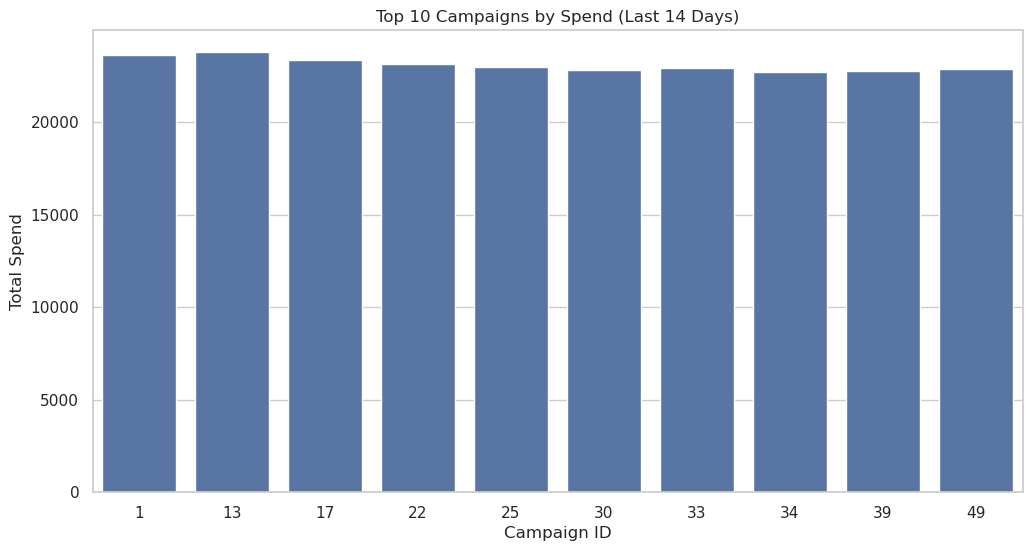

In [4]:
# Top 10 Campaigns by Spend (Last 14 Days)
top_campaigns_query = """
SELECT CAMPAIGN_ID, SUM(SPEND) AS TOTAL_SPEND
FROM CAMPAIGN_DAILY_METRICS
WHERE DT >= DATEADD('day', -14, CURRENT_DATE)
GROUP BY CAMPAIGN_ID
ORDER BY TOTAL_SPEND DESC
LIMIT 10
"""
top_campaigns = fetch_df(top_campaigns_query)
print("Top 10 campaigns by spend (last 14 days):")
display(top_campaigns)

# Plot top 10 campaigns by spend
sns.barplot(data=top_campaigns, x="CAMPAIGN_ID", y="TOTAL_SPEND")
plt.title("Top 10 Campaigns by Spend (Last 14 Days)")
plt.xlabel("Campaign ID")
plt.ylabel("Total Spend")
plt.show()

Daily CTR trend:


,DT,AVG_CTR
0,2025-06-30,0.099141
1,2025-07-01,0.099928
2,2025-07-02,0.101139
3,2025-07-03,0.098484
4,2025-07-04,0.096521
5,2025-07-05,0.099185
6,2025-07-06,0.099878
7,2025-07-07,0.096160
8,2025-07-08,0.100591
9,2025-07-09,0.103455


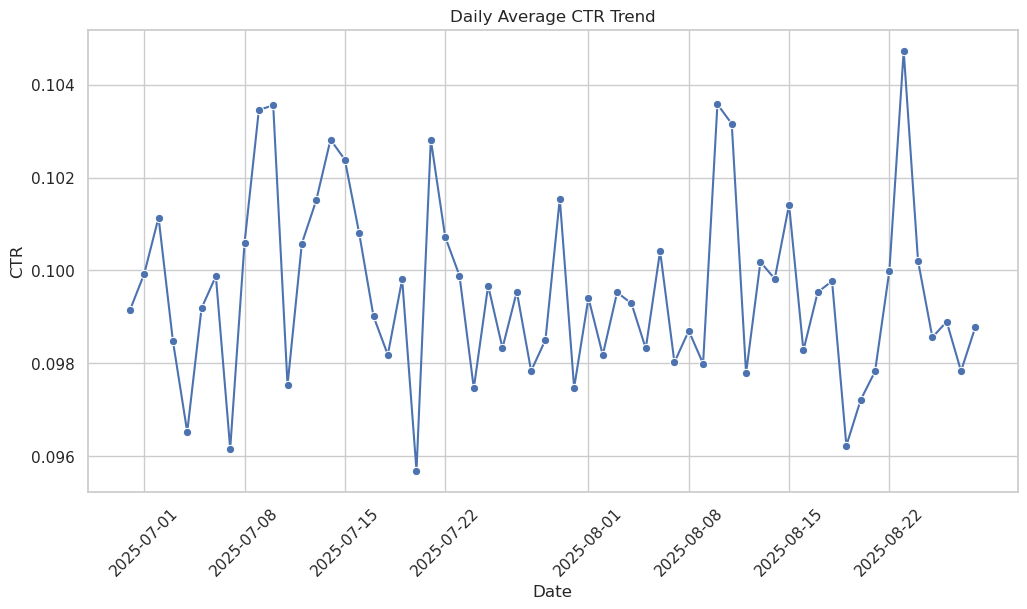

In [5]:
# Daily CTR Trend
ctr_trend_query = """
SELECT DT, AVG(CTR) AS AVG_CTR
FROM CAMPAIGN_DAILY_METRICS
GROUP BY DT
ORDER BY DT
"""
ctr_trend = fetch_df(ctr_trend_query)
print("Daily CTR trend:")
display(ctr_trend)

# Plot CTR trend
sns.lineplot(data=ctr_trend, x="DT", y="AVG_CTR", marker="o")
plt.title("Daily Average CTR Trend")
plt.xlabel("Date")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.show()

Top 10 creatives by impressions:


,CREATIVE_ID,IMPRESSIONS,CLICKS,AVG_CPC
0,1,41462397,4118904,1.721654560805
1,3,41231053,4108802,1.593459309020
2,2,41037064,4081660,1.743736777817


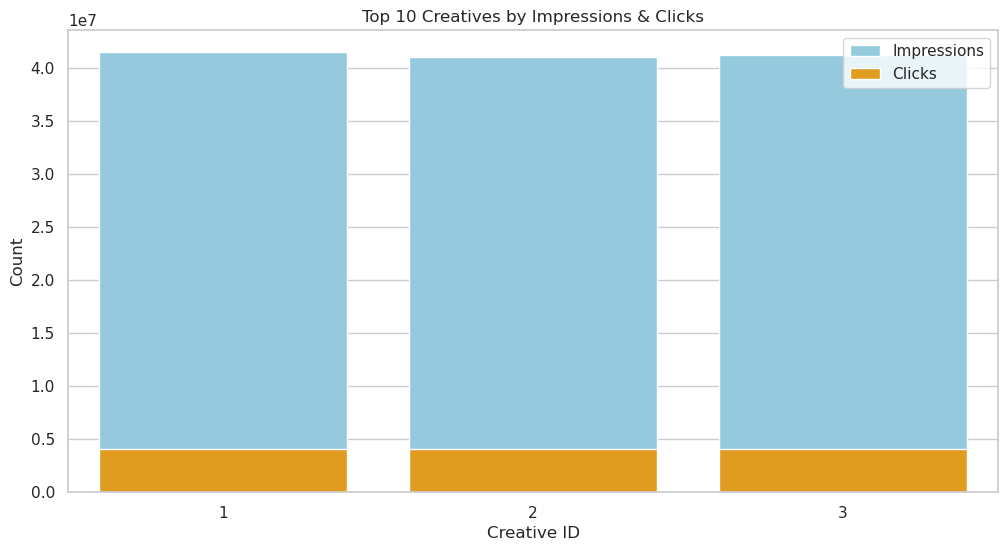

In [6]:
# Top 10 Creatives by Impressions
top_creatives_query = """
SELECT CREATIVE_ID, SUM(IMPRESSIONS) AS IMPRESSIONS, SUM(CLICKS) AS CLICKS, AVG(CPC) AS AVG_CPC
FROM CAMPAIGN_DAILY_METRICS
GROUP BY CREATIVE_ID
ORDER BY IMPRESSIONS DESC
LIMIT 10
"""
top_creatives = fetch_df(top_creatives_query)
print("Top 10 creatives by impressions:")
display(top_creatives)

# Plot impressions & clicks
sns.barplot(data=top_creatives, x="CREATIVE_ID", y="IMPRESSIONS", color="skyblue", label="Impressions")
sns.barplot(data=top_creatives, x="CREATIVE_ID", y="CLICKS", color="orange", label="Clicks")
plt.title("Top 10 Creatives by Impressions & Clicks")
plt.xlabel("Creative ID")
plt.ylabel("Count")
plt.legend()
plt.show()

In [7]:
# Close connection
cur.close()
conn.close()